In [1]:
#import modules
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score as r2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load the data
df=pd.read_excel('DS - Assignment Part 1 data set.xlsx')

In [3]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [4]:
df.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

In [5]:
df.shape

(414, 9)

In [6]:
# checking if NA values are there or not
df.isna().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [7]:
df=df.drop(['Transaction date'],axis=1)

In [8]:
df.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


<AxesSubplot:>

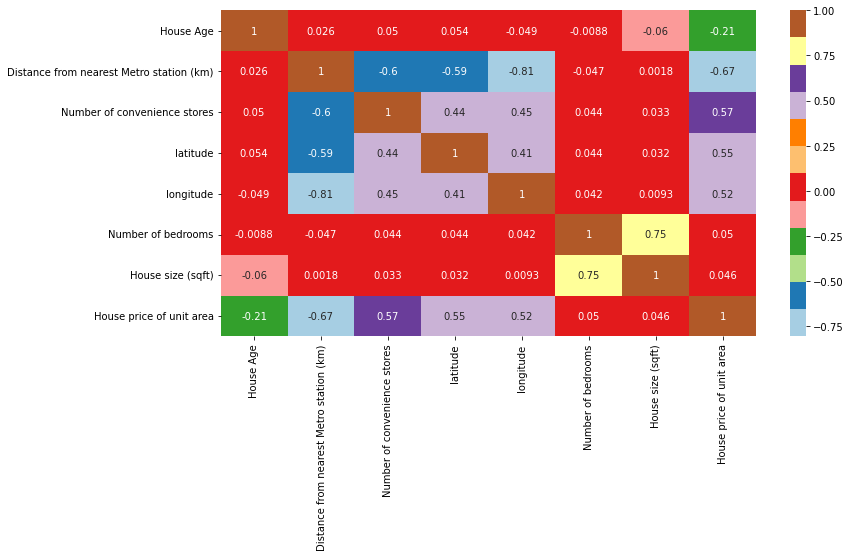

In [9]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='Paired',annot=True)

In [10]:
corr_matrix = df.corr()
print(corr_matrix['House price of unit area'].sort_values(ascending=False))

House price of unit area                    1.000000
Number of convenience stores                0.571005
latitude                                    0.546307
longitude                                   0.523287
Number of bedrooms                          0.050265
House size (sqft)                           0.046489
House Age                                  -0.210567
Distance from nearest Metro station (km)   -0.673613
Name: House price of unit area, dtype: float64


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


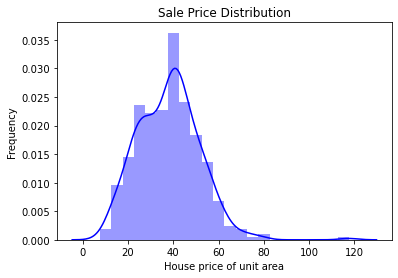

In [11]:
#Checking the distribution of the target target column i.e. (House price of unit area)
sns.distplot(df['House price of unit area'], color = 'b')
plt.title('Sale Price Distribution')
plt.xlabel('House price of unit area')
plt.ylabel('Frequency')
plt.show()
     

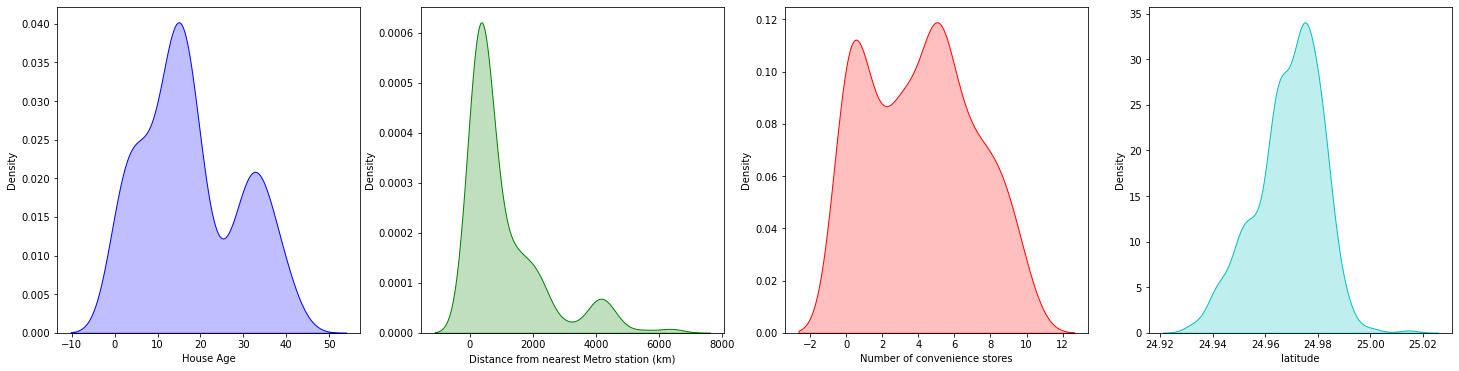

In [12]:
# Checking distribution of the dataset
plt.figure(figsize = (25,6))

plt.subplot(1,4,1)
sns.kdeplot(df['House Age'], shade = True, color = "b")

plt.subplot(1,4,2)
sns.kdeplot(df["Distance from nearest Metro station (km)"], shade = True, color = "g")

plt.subplot(1,4,3)
sns.kdeplot(df['Number of convenience stores'], shade = True, color = "r")

plt.subplot(1,4,4)
sns.kdeplot(df.latitude, shade = True, color = "c")
plt.show()

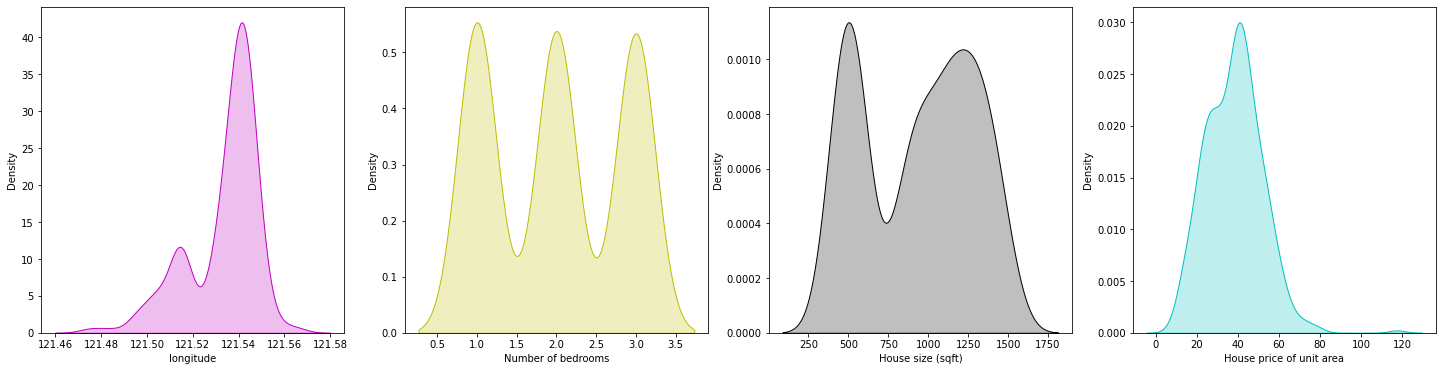

In [13]:
plt.figure(figsize = (25,6))

plt.subplot(1,4,1)
sns.kdeplot(df.longitude, shade = True, color = "m")

plt.subplot(1,4,2)
sns.kdeplot(df['Number of bedrooms'], shade = True, color = "y")

plt.subplot(1,4,3)
sns.kdeplot(df['House size (sqft)'], shade = True, color = "k")

plt.subplot(1,4,4)
sns.kdeplot(df['House price of unit area'], shade = True, color = "c")
plt.show()  

In [14]:
# Checking skewness of the dataset
skewness = []
kurtosis = []
newdf = pd.DataFrame(df.select_dtypes(include = ["int64", "float64"]).columns, columns = ["Variable"])

for var in df.select_dtypes(include = ["int64", "float64"]).columns:
    skewness.append(df[var].skew())
    kurtosis.append(df[var].kurtosis())
newdf["Skewness"] = skewness
newdf["Kurtosis"] = kurtosis
newdf

,Variable,Skewness,Kurtosis
0,House Age,0.382926,-0.877120
1,Distance from nearest Metro station (km),1.888757,3.207868
2,Number of convenience stores,0.154607,-1.065751
3,latitude,-0.438598,0.269070
4,longitude,-1.219591,1.201792
5,Number of bedrooms,0.022309,-1.508457
6,House size (sqft),-0.113627,-1.422019
7,House price of unit area,0.599853,2.179097


In [15]:
# Lets normalize the columns of House price of unit area, Distance from nearest Metro station (km),Number of bedrooms,longitude

In [16]:
# Applying log transformation on House price of unit area, Distance from nearest Metro station (km),
# Number of bedrooms,longitude variables
df['House price of unit area'] = np.log(df['House price of unit area'])
df['Distance from nearest Metro station (km)'] = np.log(df['Distance from nearest Metro station (km)'])
df['Number of bedrooms'] = np.log(df['Number of bedrooms'])
df["longitude"] = np.log(df["longitude"])

In [17]:
# Spliting data into train and test
from sklearn.model_selection import train_test_split

X = df.iloc[1:414,1:7].values
y = df.iloc[1:414,7].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 200)

In [18]:
# Random Forest
RF=RandomForestRegressor(n_estimators=100)
RF.fit(X_train, y_train)
RF_yhat = RF.predict(X_test)
print('R-Squared of Random forest is {}'.format(r2(y_test, RF_yhat)))

R-Squared of Random forest is 0.7883622487011314


In [19]:
# Linear Regression
LR = LinearRegression()
LR.fit(X_train, y_train)
LR_yhat = LR.predict(X_test)
print('R-Squared of Linear Regression model is {}'.format(r2(y_test, LR_yhat)))

R-Squared of Linear Regression model is 0.7415516596877358


In [20]:
# Ridge
ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
ridge_yhat = ridge.predict(X_test)
print('R-Squared of Ridge model is {}'.format(r2(y_test, ridge_yhat)))

R-Squared of Ridge model is 0.6315732011882222


In [21]:
# Lasso
lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)
lasso_yhat = lasso.predict(X_test)
print('R-Squared of Lasso model is {}'.format(r2(y_test, lasso_yhat)))

R-Squared of Lasso model is 0.6164718233826814


Random Forest model is giving the accuracy of 79%

So best model for predicting house price is random forest